In [1]:
import rospy
import rospkg

import cv2 as cv
from cluttered_grasp.srv import superpixel
from cluttered_grasp.srv import pure_kmeans
from cv_bridge import CvBridge
from matplotlib import pyplot as plt
# Authored by Gary Lvov

In [2]:
rospy.init_node("test_pure")
br = CvBridge()

In [3]:
def get_superpixels():
        rospy.wait_for_service("/superpixel")
        try:
            get_image = rospy.ServiceProxy("/superpixel", superpixel)
            img = get_image().image # get the image in bytes format
            # img = self.br.imgmsg_to_cv2(img)-
            return img
        except rospy.ServiceException as e:
            print("Service call failed: %s"%e)

In [4]:
superpixels = get_superpixels()

In [5]:
def get_pure_regions(superpixels):
    rospy.wait_for_service("/pure_with_kmeans")
    try:
        get_pure = rospy.ServiceProxy('/pure_with_kmeans', pure_kmeans)
        pure_img = get_pure(superpixels).pure_regions
        pure_img = br.imgmsg_to_cv2(pure_img)
        return pure_img
    except rospy.ServiceException as e:
        print("Service call failed: %s"%e)

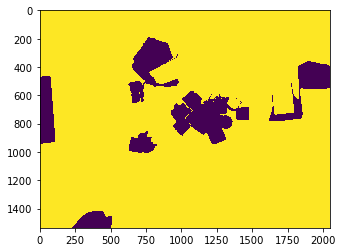

In [6]:
pure_img = get_pure_regions(superpixels)
plt.figure()
plt.imshow(pure_img)